In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

from darts.metrics import mape, mse, rmse, mae
from darts.models.filtering.moving_average_filter import MovingAverageFilter

from utils import print_metrics, plot_forecast, backtest, Dataset, TimeseriesExperiment

import pickle

import os

In [21]:
weather_station_location = pd.read_csv("data/ww2_weather/Weather Station Locations.csv")
weather = pd.read_csv("data/ww2_weather/Summary of Weather.csv")

most_common_station = weather['STA'].value_counts().idxmax()
weather = weather[weather['STA'] == most_common_station]


Ww2_weather_dataset = Dataset(
    TimeSeries.from_dataframe(
        weather,
        time_col="Date",
        value_cols="MeanTemp",
        freq=None,
        fill_missing_dates=True,
    ),
    "weather",
)

/var/folders/sb/lscvlfl93vn61r3jxcm6s4400000gn/T/ipykernel_56132/728423524.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("data/ww2_weather/Summary of Weather.csv")


In [25]:
HORIZONS = [1, 2, 3, 5, 7, 9, 10]

def run_experiment(model):
    for horizon in HORIZONS:
        experiment = TimeseriesExperiment(
            model,
            Ww2_weather_dataset,
            {},
            use_pretrained_model=True,
            forecast_horizon=horizon,
            retrain=True

        )
        experiment.run()

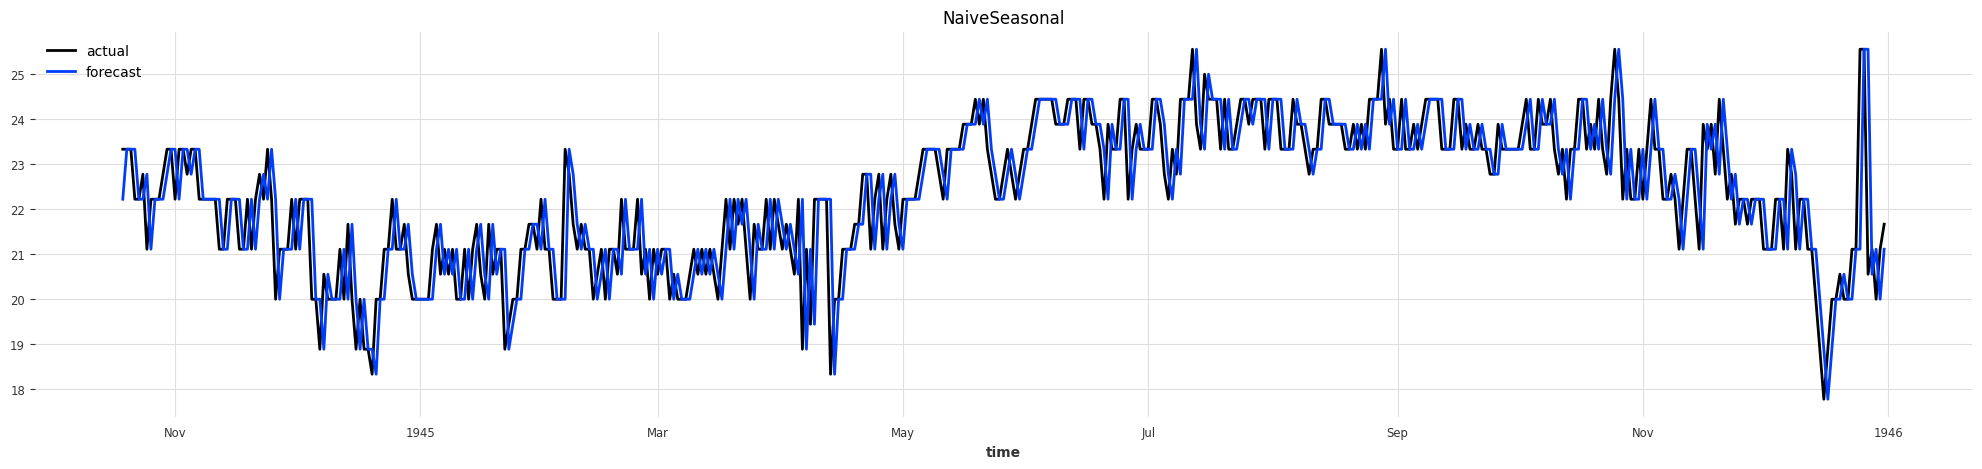

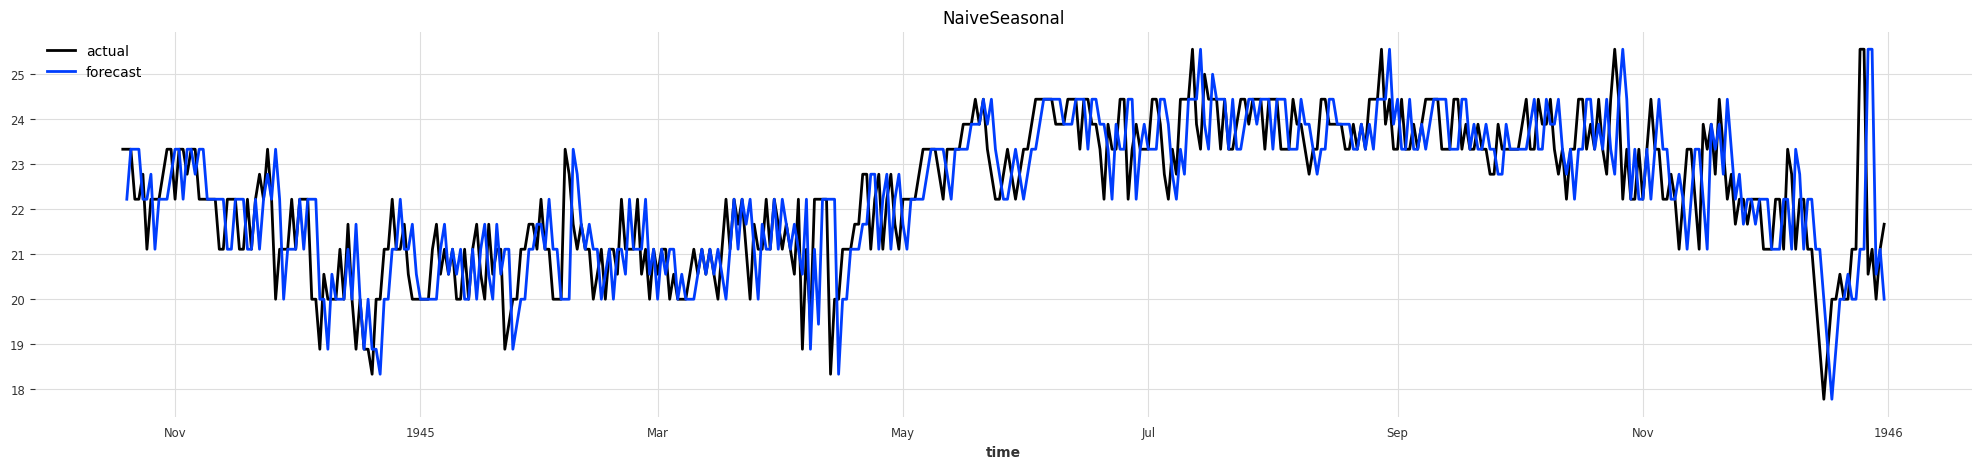

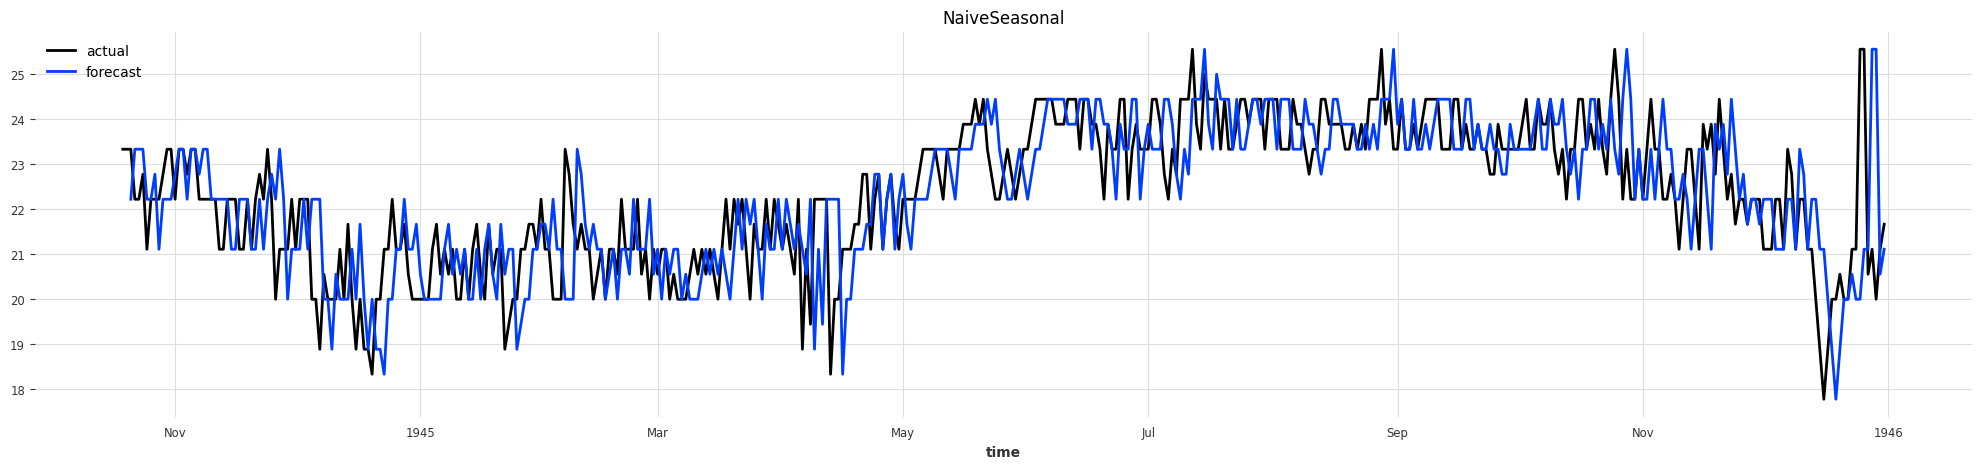

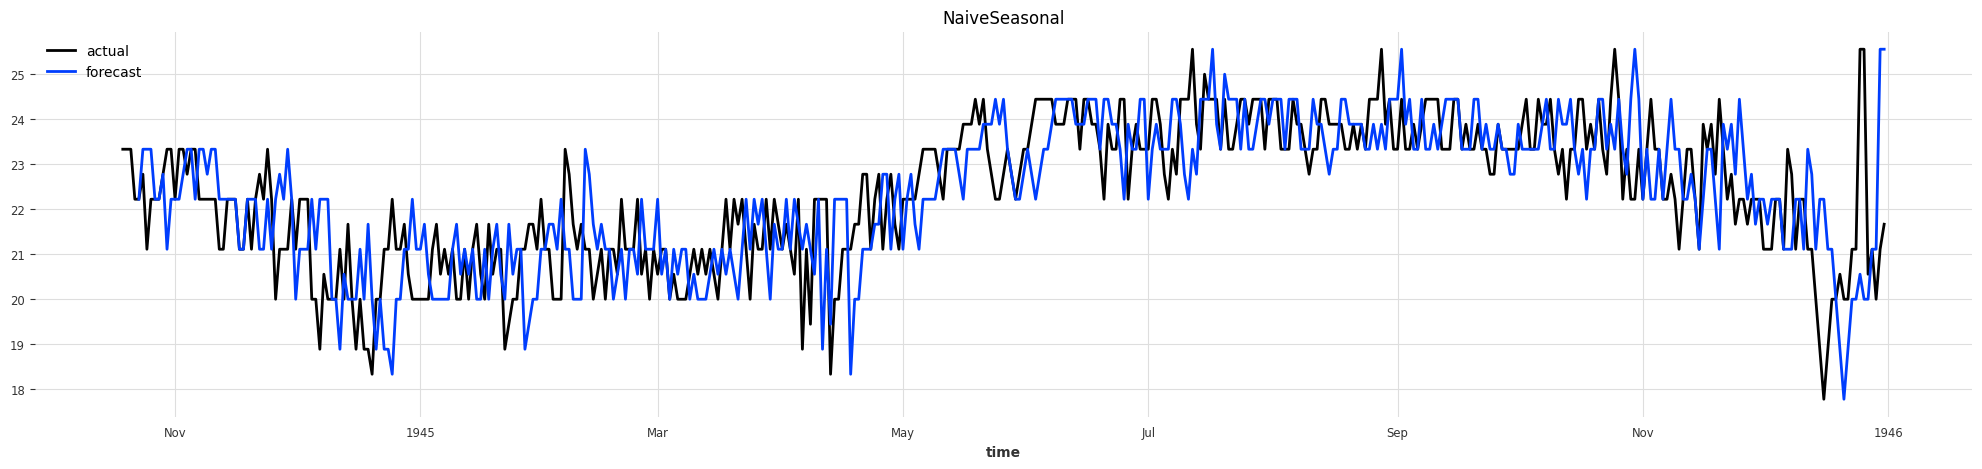

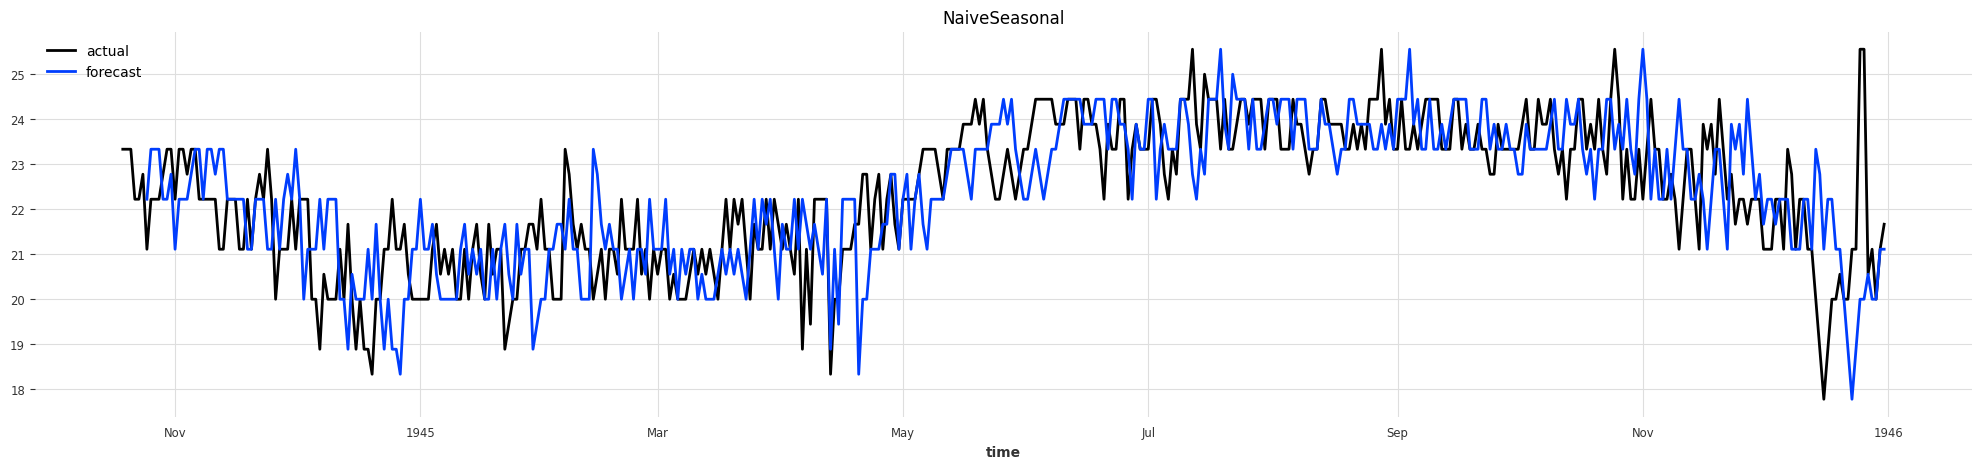

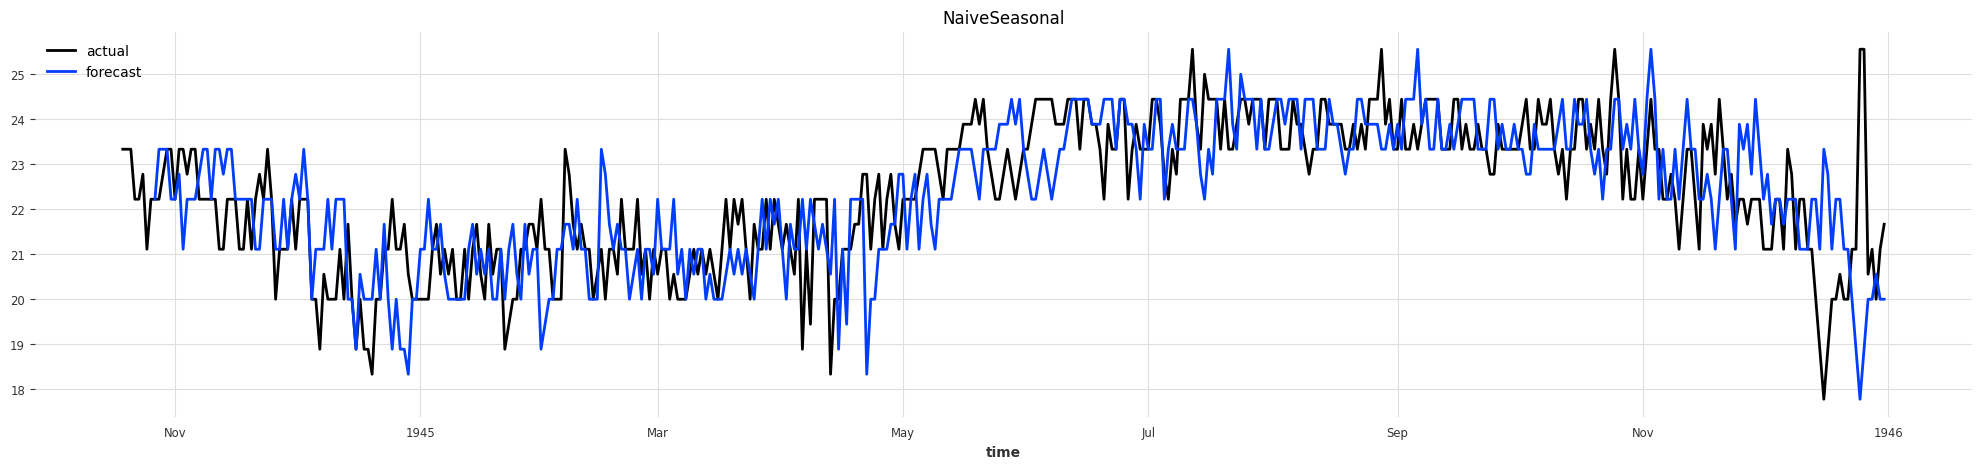

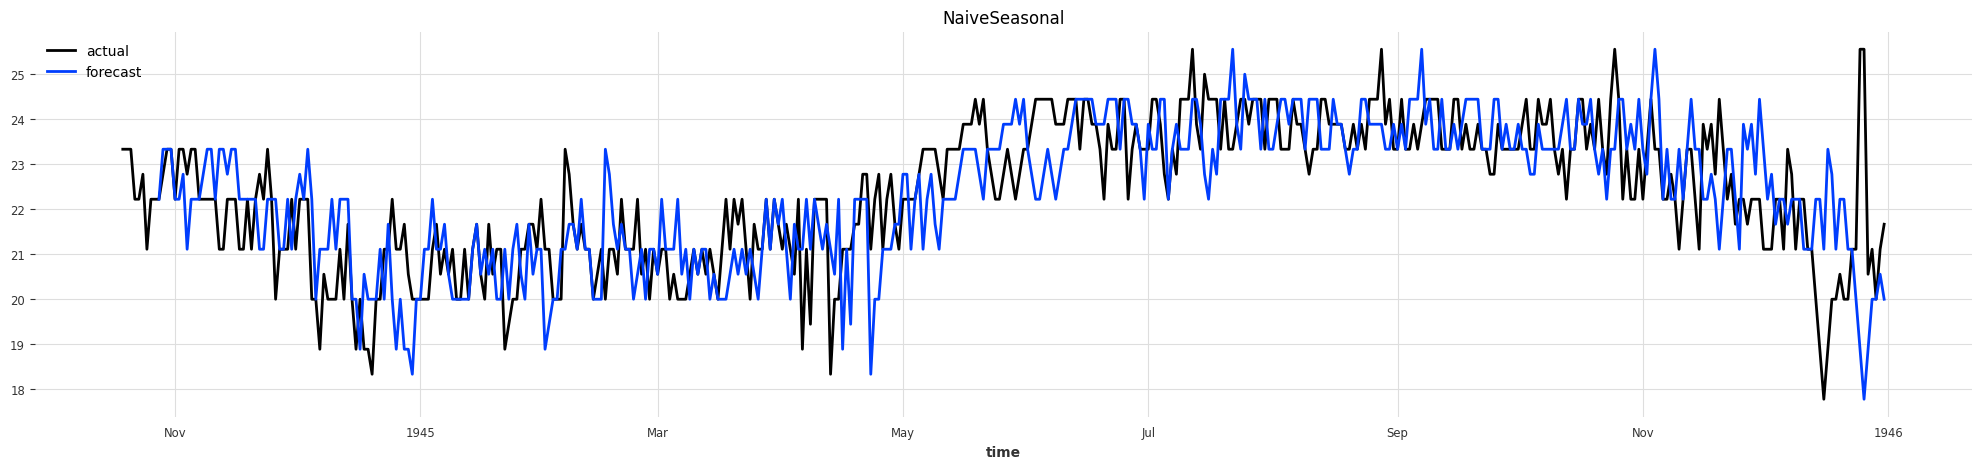

In [26]:
from darts.models import NaiveSeasonal
HORIZONS = [1, 2, 3, 5, 7, 9, 10]

naive_model = NaiveSeasonal(K=1)
run_experiment(naive_model)


In [ ]:

from darts.models.forecasting.xgboost import XGBModel

xgb_model = XGBModel(lags=24 * 7, output_chunk_length=100) # todo, verify lags
run_experiment(xgb_model)